<a href="https://colab.research.google.com/github/FranciaAlday/Proyectos/blob/main/PPCienciaDatos/Tareas/Copia_de_Series_de_Tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Series de tiempo


Autor Alday Martínez, Francia Aide

Autor Castañeda Mora, Carlos

Fecha 13/noviembre/2023

Descripción: Realizar series de tiempo en R e implementar en un nuevo dataset.

##Programar en R

###Media móvil

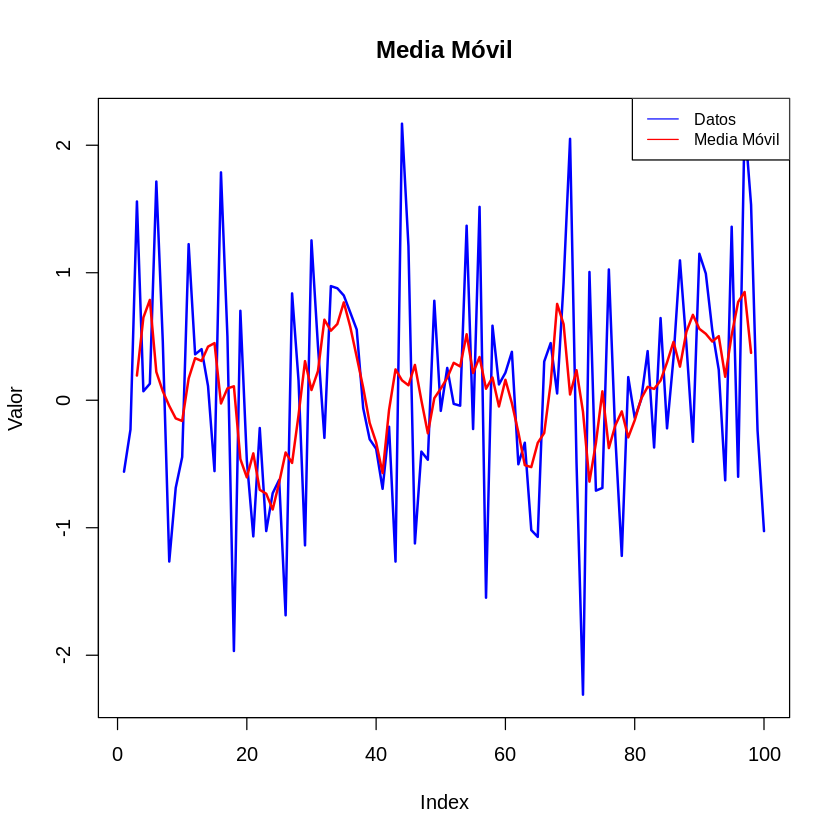

In [ ]:
set.seed(123)
datos <- rnorm(100)
media_movil <- function(x, ventana) {
  # Utiliza la función filter para calcular la media móvil
  return(filter(x, rep(1/ventana, ventana), sides=2))
}

# Ventana de la media móvil (en este caso, 3 observaciones)
ventana <- 5

# Calcula la media móvil
resultado <- media_movil(datos, ventana)

plot(datos, type = "l", col = "blue", lwd = 2, ylab = "Valor", main = "Media Móvil")
lines(resultado, col = "red", lwd = 2)
legend("topright", legend = c("Datos", "Media Móvil"), col = c("blue", "red"), lty = 1:1, cex = 0.8)

###Exponencial

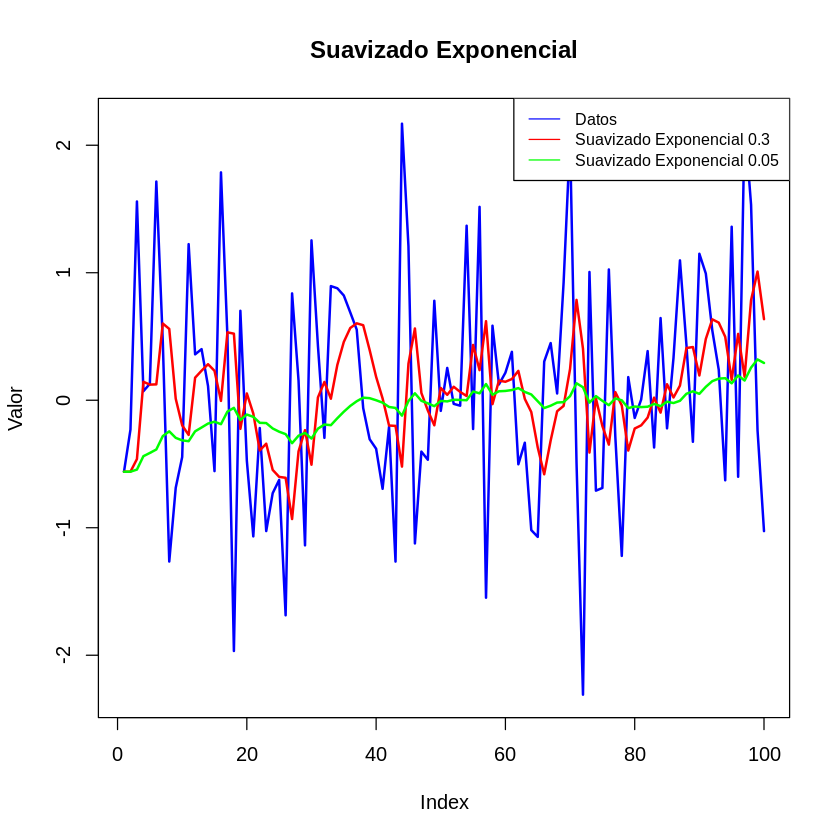

In [ ]:
# Función para suavizado exponencial
exponential_smoothing <- function(datos, alpha) {
  n <- length(datos)
  resultado <- numeric(n)
  resultado[1] <- datos[1]

  for (i in 2:n) {
    resultado[i] <- alpha * datos[i - 1] + (1 - alpha) * resultado[i - 1]
  }

  return(resultado)
}

# Genera datos de ejemplo
set.seed(123)
datos <- rnorm(100)


#Aplicamos el suavizado exponencial.
resultados <- exponential_smoothing(datos, 0.3)
resultados1 <- exponential_smoothing(datos, 0.05)

# Crea la gráfica
plot(datos, type = "l", col = "blue", lwd = 2, ylab = "Valor", main = "Suavizado Exponencial")
lines(resultados, col = "red", lwd = 2)
lines(resultados1, col = "green", lwd = 2)
legend("topright", legend = c("Datos", "Suavizado Exponencial 0.3", "Suavizado Exponencial 0.05"), col = c("blue", "red","green"), lty = 1:1, cex = 0.8)


##Urban Consumer Price Index from the US Bureau of Labor Statistics

###Recolección de datos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#Estadísticas para Time Series
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
precios = pd.read_csv('CPIAUCSL.csv', index_col=['DATE'], parse_dates=['DATE'])
precios.head()

,CPIAUCSL
DATE,
1947-01-01,21.48
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95


In [ ]:
precios.tail()

,CPIAUCSL
DATE,
2023-06-01,303.841
2023-07-01,304.348
2023-08-01,306.269
2023-09-01,307.481
2023-10-01,307.619


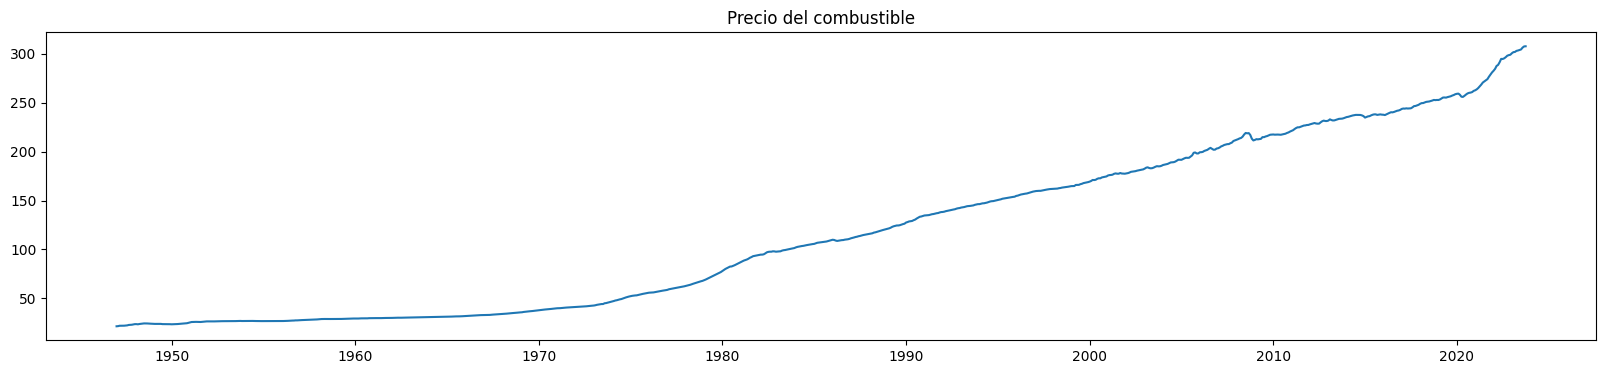

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(precios.CPIAUCSL)
plt.title('Precio del combustible')
plt.show()

<Axes: xlabel='DATE'>

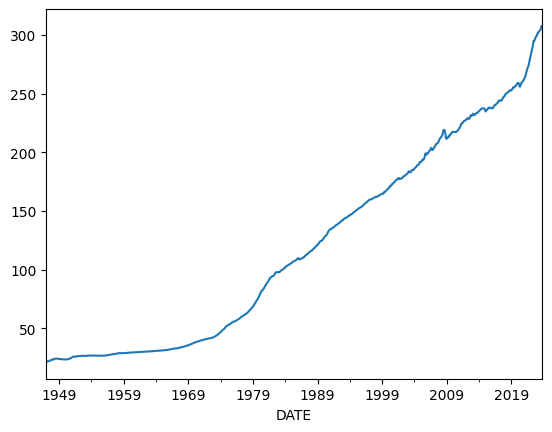

In [ ]:
precios.CPIAUCSL.plot()

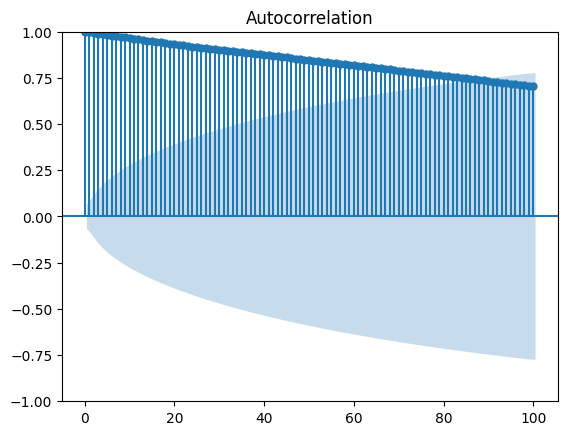

In [ ]:
sm.graphics.tsa.plot_acf(precios.CPIAUCSL.values,lags=100);

###Media móvil

In [ ]:
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true,y_pred):
  return np.mean(np.abs((y_true - y_pred)/y_true ))*100

def plot_moving_average(series,window,plot_intervals=False,
                        scale=1.96,plot_anomalies=False):
  '''
  series = dataframe con la serie de tiempo
  window = tamaño de la ventana
  plot_intervals = bandera para mostrar intervalos de confianza
  scale = escala para los intervalos de confianza
  plot_anomalies = bandera para mostrar las anomalias
  '''
  rolling_mean = series.rolling(window=window).mean() ## version de pandas para la media movil
  plt.figure(figsize=(10,4))
  plt.title('Media movil \ntamaño de la ventana ={}'.format(window))
  plt.plot(rolling_mean,'g',label='Tendencia por media movil')

  if plot_intervals:
    mae = mean_absolute_error(series[window:],rolling_mean[window:])
    deviation = np.std(series[window:] - rolling_mean[window:])
    low_ = rolling_mean - (mae+scale*deviation)
    upp_ = rolling_mean + (mae+scale*deviation)
    plt.plot(upp_,'r--',label='Limite inferior/superior')
    plt.plot(low_,'r--')

  if plot_anomalies:
    anom = pd.DataFrame(index=series.index, columns=series.columns)
    anom[series<low_] = series[series<low_]
    anom[series>upp_] = series[series>upp_]
    plt.plot(anom,'ro',markersize=10)

  plt.plot(series[window:],label='Valores reales')
  plt.legend(loc='best')
  plt.xticks(rotation=30)

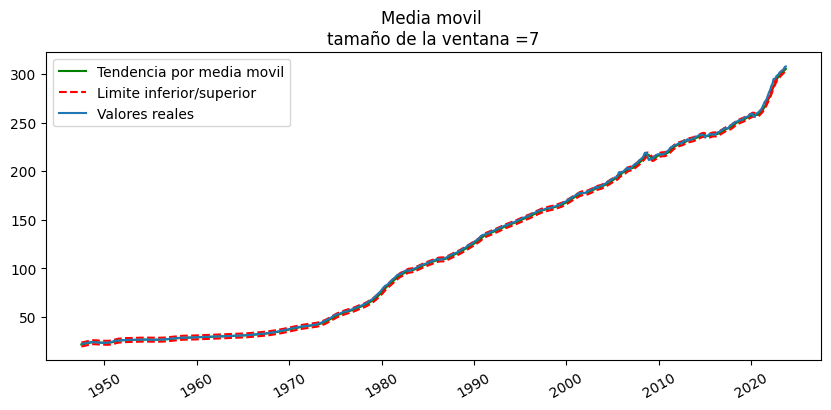

In [ ]:
plot_moving_average(precios.CPIAUCSL,7,plot_intervals=True,scale=1)

###Exponential Smoothing

In [ ]:
from pandas.core import series
#Suavizado exponencial ya implementado
from statsmodels.tsa.api import ExponentialSmoothing

def plot_exp(series, alpha):
  es1 = ExponentialSmoothing((series), seasonal_periods=12,
                             trend='add', seasonal='add').fit()
  #Pronóstico
  es2 = es1.forecast(len(series)//4)
  series.plot(kind='line', figsize=(15,5))
  es2.plot(kind='line')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


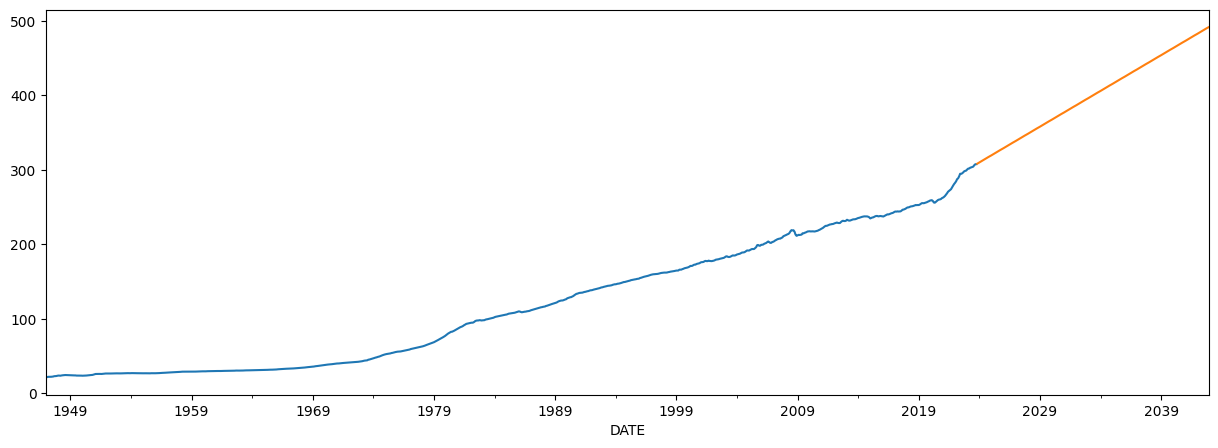

In [ ]:
plot_exp(precios.CPIAUCSL, 0.3)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


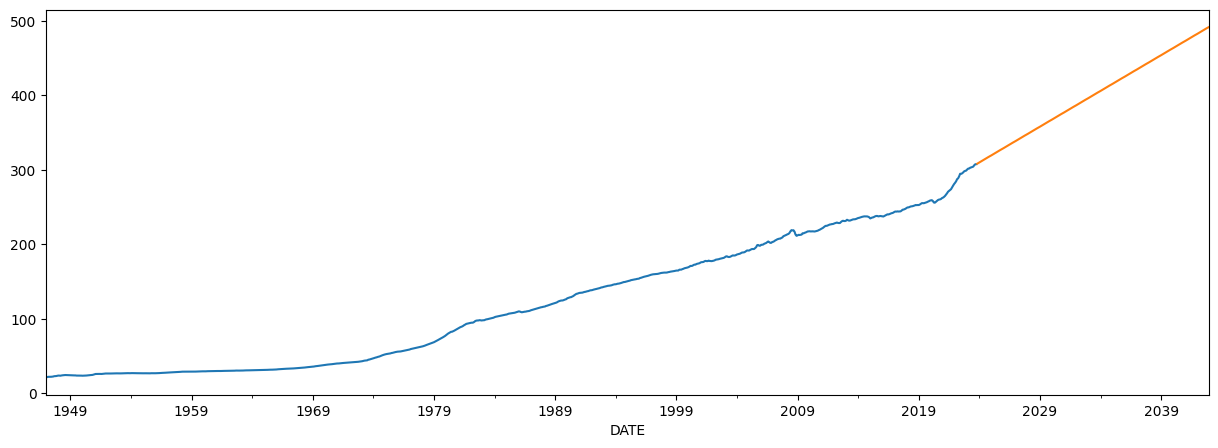

In [ ]:
plot_exp(precios.CPIAUCSL, 0.05)

###HoltWinters

In [ ]:
from pandas.core import series
#Holt-Winters
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def plot_hw_smoothing(series, n=20):
  hw = ExponentialSmoothing((series), seasonal_periods=12).fit()
  #predicción
  train, test = series[:-n], series[len(series)-n:]
  hw_pred = hw.predict(start=test.index[0], end=test.index[-1])
  plt.figure(figsize=(15,5))
  plt.plot(train.index, train, label= 'Entrenamiento')
  plt.plot(test.index, test, label='Prueba')
  plt.plot(hw_pred.index, hw_pred, label='Holt-Winters')
  plt.legend(loc='best')
  plt.grid(True)
  plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


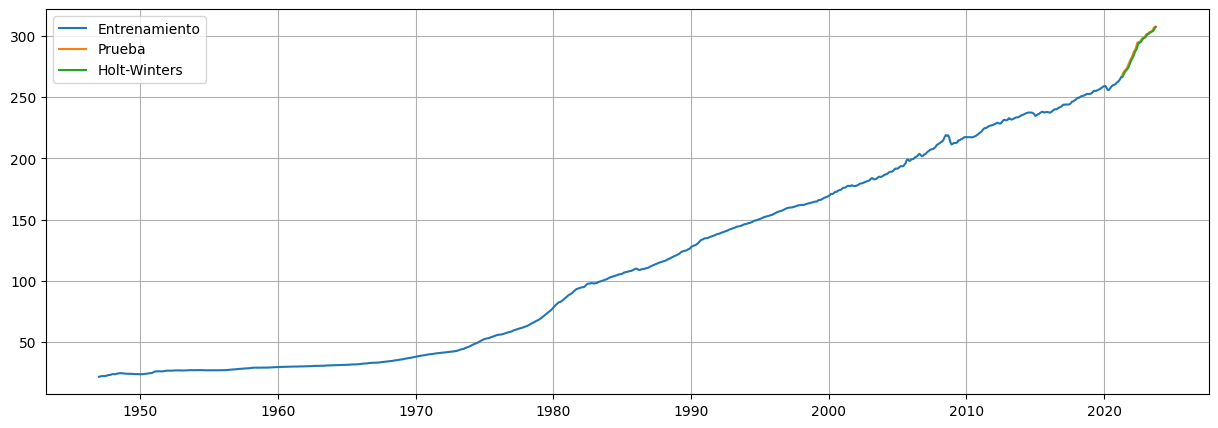

In [ ]:
plot_hw_smoothing(precios.CPIAUCSL, 30)

###Regresión Lineal

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#Estadísticas para Time Series
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
data = pd.DataFrame(precios.CPIAUCSL.copy())
data.columns= ['y']
data.head()
for i in range(6,25):
  data['lag_{}'.format(i)] = data.y.shift(i)
data.head(10)

,y,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
DATE,,,,,,,,,,,,,,,,,,,,
1947-01-01,21.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-02-01,21.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-03-01,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-04-01,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-05-01,21.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-06-01,22.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-07-01,22.23,21.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-08-01,22.40,21.62,21.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-09-01,22.84,22.00,21.62,21.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Dividir el conjunto
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
#Time Series Cross Validation con 5 pliegues
tscv = TimeSeriesSplit(n_splits=5)

In [ ]:
def timeseries_train_test_split(X,y, test_size):
  test_index = int(len(X) * (1-test_size))
  X_train, y_train = X.iloc[:test_index], y.iloc[:test_index]
  X_test, y_test = X.iloc[test_index:], y.iloc[test_index:]
  return X_train, X_test, y_train, y_test

In [ ]:
#Preprocesamiento
y = data.dropna().y
X = data.dropna().drop(['y'], axis = 1)
#30% para pruebas
X_train, X_test, y_train, y_test = timeseries_train_test_split(X,y,0.3)

In [ ]:
X_train.head()

,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
DATE,,,,,,,,,,,,,,,,,,,
1949-01-01,24.40,24.15,24.01,23.82,23.50,23.67,23.68,23.41,23.06,22.91,22.84,22.40,22.23,22.08,21.95,22.00,22.00,21.62,21.48
1949-02-01,24.43,24.40,24.15,24.01,23.82,23.50,23.67,23.68,23.41,23.06,22.91,22.84,22.40,22.23,22.08,21.95,22.00,22.00,21.62
1949-03-01,24.36,24.43,24.40,24.15,24.01,23.82,23.50,23.67,23.68,23.41,23.06,22.91,22.84,22.40,22.23,22.08,21.95,22.00,22.00
1949-04-01,24.31,24.36,24.43,24.40,24.15,24.01,23.82,23.50,23.67,23.68,23.41,23.06,22.91,22.84,22.40,22.23,22.08,21.95,22.00
1949-05-01,24.16,24.31,24.36,24.43,24.40,24.15,24.01,23.82,23.50,23.67,23.68,23.41,23.06,22.91,22.84,22.40,22.23,22.08,21.95


In [ ]:
#Modelo de regresión lineal
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train,y_train)

In [ ]:
from IPython.core.pylabtools import figsize
def plot_lr_ts(model, X_train, X_test, y_train, y_test, scale = 1.96,
               plot_intervals=False, plot_anomalies=False):
  pred = model.predict(X_test)
  plt.figure(figsize=(15,7))
  plt.plot(pred, 'g', label='Predicción', linewidth=2)
  plt.plot(y_test.values, label='Real', linewidth=2)
  #p_i intervalos
  if plot_intervals:
    cv = cross_val_score(model, X_train, y_train, cv=tscv, scoring='neg_mean_absolute_error')
    mae = cv.mean() * (-1)
    dev = cv.std()
    low = pred - (mae + scale*dev)
    upp = pred + (mae + scale*dev)
    plt.plot(low, 'r--', label='Límite inferior/superior', alpha=0.5)
    plt.plot(upp, 'r--', alpha=0.5)
  #p_a
  #error = mean_absolute_error(pred, y_test)
  error=0.58
  plt.title('Error absoluto promedio = {0:.3f}%'.format(error))
  plt.legend(loc='best')
  plt.tight_layout()
  plt.grid(True)
  plt.show()

def plot_coefficients(model):
  coefs = pd.DataFrame(model.coef_, X_train.columns)
  coefs.columns=['coef']
  coefs['abs'] = coefs.coef.apply(np.abs)
  coefs = coefs.sort_values(by='abs', ascending=False).drop(['abs'], axis=1)
  plt.figure(figsize=(15,7))
  coefs.coef.plot(kind='bar')
  plt.grid(True, axis='y')
  plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyle='dashed')
  plt.show()

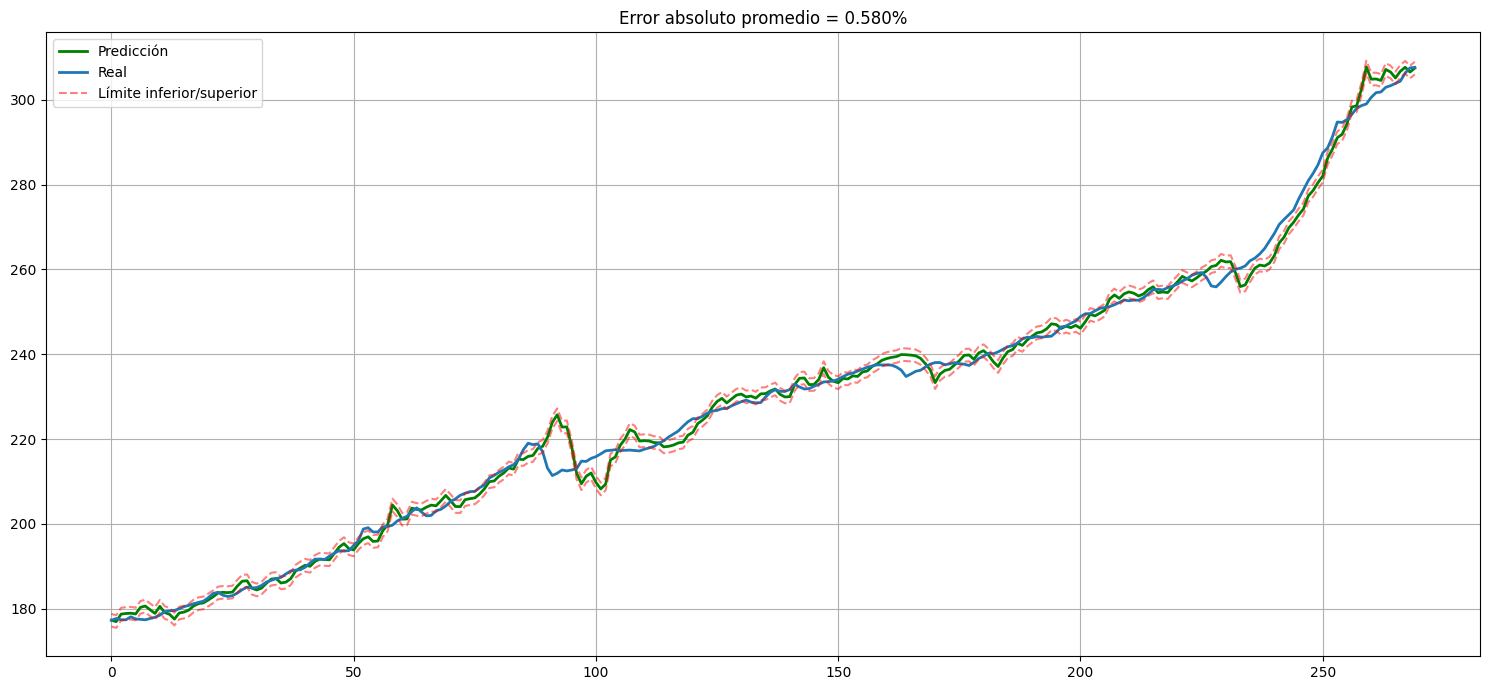

In [ ]:
plot_lr_ts(lr, X_train, X_test,y_train,y_test, plot_intervals=True)

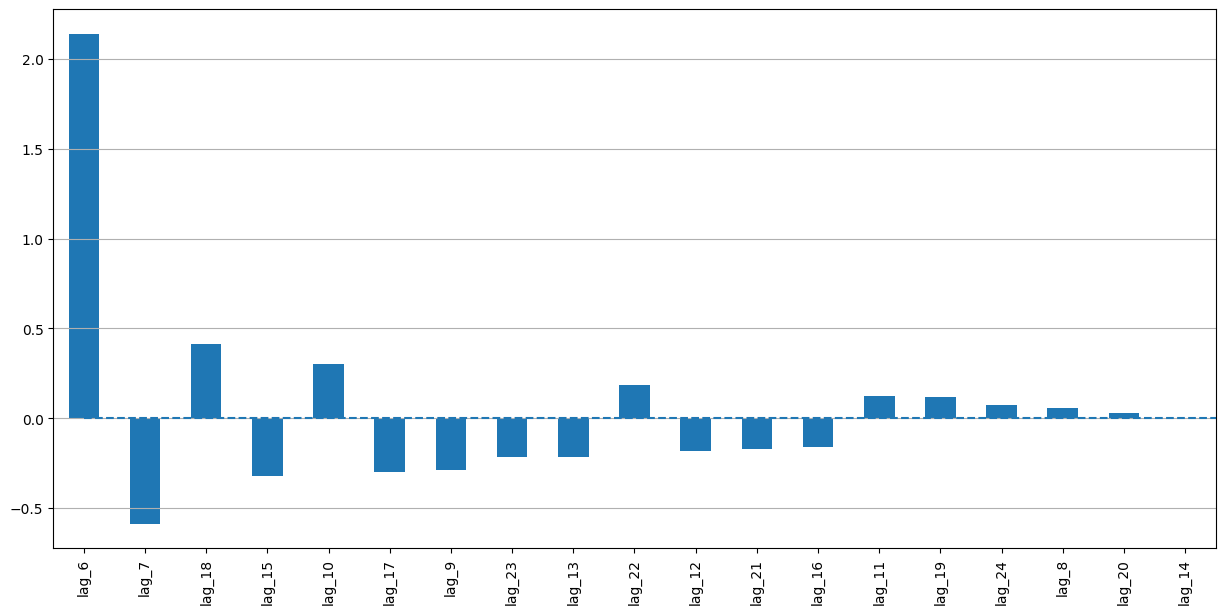

In [ ]:
plot_coefficients(model)

Cada una de estas bibliotecas en Python se utiliza para realizar análisis estadísticos y modelado de series temporales. Aquí hay una breve descripción de cada una:

1. **`statsmodels.formula.api` (`smf`):**
   - **Propósito:** Proporciona herramientas para especificar y ajustar modelos estadísticos utilizando fórmulas similares a las utilizadas en R.
   - **Uso común:** Se utiliza para ajustar modelos estadísticos lineales y no lineales utilizando fórmulas que describen la relación entre las variables.

2. **`statsmodels.tsa.api` (`smt`):**
   - **Propósito:** Ofrece herramientas específicas para el análisis de series temporales, incluyendo modelos ARIMA (Autoregressive Integrated Moving Average), SARIMA (Seasonal ARIMA), modelos de suavización exponencial, entre otros.
   - **Uso común:** Se utiliza para analizar y modelar series temporales, realizar pruebas de estacionariedad, y ajustar modelos ARIMA y otros modelos relacionados.

3. **`statsmodels.api` (`sm`):**
   - **Propósito:** Proporciona una amplia gama de herramientas estadísticas para el análisis de datos, incluyendo regresión lineal, análisis de varianza, modelos lineales generalizados, etc.
   - **Uso común:** Utilizado para ajustar modelos estadísticos, realizar pruebas de hipótesis, y llevar a cabo diversos análisis estadísticos.

4. **`scipy.stats` (`scs`):**
   - **Propósito:** Parte del paquete SciPy, proporciona funciones estadísticas y distribuciones de probabilidad.
   - **Uso común:** Utilizado para realizar pruebas estadísticas, calcular intervalos de confianza, y trabajar con distribuciones de probabilidad.

En resumen, estas bibliotecas son componentes fundamentales para realizar análisis estadísticos, modelado de series temporales y pruebas de hipótesis en Python. Cada una tiene su propio conjunto de funcionalidades especializadas, lo que permite a los analistas y científicos de datos llevar a cabo una variedad de tareas estadísticas en sus proyectos.

Aquí está una descripción de las funcionalidades proporcionadas por las líneas de código mencionadas:

1. **Media Móvil con Pandas:**
   - **Propósito:** Calcula la media móvil de una serie temporal utilizando la función `rolling` de Pandas.
   - **Cómo funciona:** La función `rolling` crea una ventana móvil a lo largo de la serie temporal y luego se aplica la función `mean()` para calcular la media en cada ventana. Esto es útil para suavizar la serie y destacar tendencias a largo plazo.

   ```python
   rolling_mean = series.rolling(window=window).mean()
   ```

2. **Suavizado Exponencial (Exponential Smoothing) con statsmodels:**
   - **Propósito:** Implementa el método de suavizado exponencial utilizando la clase `ExponentialSmoothing` de statsmodels.
   - **Cómo funciona:** El suavizado exponencial es un método de pronóstico que asigna pesos exponenciales decrecientes a las observaciones pasadas. Puede ser útil para pronosticar en series temporales con tendencias y patrones estacionales.

   ```python
   from statsmodels.tsa.api import ExponentialSmoothing
   ```

3. **Holt-Winters con statsmodels:**
   - **Propósito:** Implementa el método de Holt-Winters para el suavizado exponencial con estacionalidad utilizando la clase `ExponentialSmoothing` de statsmodels.
   - **Cómo funciona:** El método de Holt-Winters es una extensión del suavizado exponencial que también incorpora componentes de tendencia y estacionalidad. Es útil para modelar series temporales con patrones complejos.

   ```python
   from statsmodels.tsa.holtwinters import ExponentialSmoothing
   ```

Estas técnicas son ampliamente utilizadas en el análisis de series temporales para suavizar datos y realizar pronósticos. La elección de una técnica específica depende de la naturaleza de los datos y los patrones que se pretende capturar.

La media móvil y el suavizado exponencial son técnicas comunes utilizadas en el análisis de series temporales para suavizar datos y resaltar patrones subyacentes. Aquí hay una breve descripción de cada una:

1. **Media Móvil:**
   - **Definición:** La media móvil es una técnica que suaviza una serie temporal calculando el promedio de un conjunto de puntos adyacentes en la serie.
   - **Cómo funciona:** Se utiliza una ventana móvil que se desplaza a lo largo de la serie, y en cada posición de la ventana, se calcula el promedio de los puntos dentro de la ventana. Esto ayuda a suavizar variaciones a corto plazo y a destacar tendencias a largo plazo.
   - **Uso:** La media móvil es útil para identificar patrones subyacentes y tendencias en datos ruidosos o fluctuantes.

   ```python
   # Ejemplo en pandas
   rolling_mean = series.rolling(window=window).mean()
   ```

2. **Suavizado Exponencial:**
   - **Definición:** El suavizado exponencial es una técnica que asigna pesos exponenciales decrecientes a observaciones pasadas para suavizar una serie temporal.
   - **Cómo funciona:** En lugar de asignar el mismo peso a todas las observaciones pasadas, el suavizado exponencial asigna un peso mayor a las observaciones más recientes y pesos decrecientes a las observaciones anteriores. Esto significa que las observaciones más recientes tienen más influencia en la predicción futura.
   - **Uso:** El suavizado exponencial es especialmente útil cuando hay una tendencia en los datos y se desea capturar de manera eficiente la información más reciente.

   ```python
   from statsmodels.tsa.api import ExponentialSmoothing
   ```

Ambas técnicas son métodos simples pero efectivos para suavizar datos en el contexto de series temporales. La elección entre la media móvil y el suavizado exponencial depende de la naturaleza de los datos y de los patrones que se deseen destacar o eliminar.